In [ ]:
!git clone https://github.com/rslim087a/track/

Cloning into 'track'...
remote: Enumerating objects: 12163, done.
remote: Total 12163 (delta 0), reused 0 (delta 0), pack-reused 12163
Receiving objects: 100% (12163/12163), 156.98 MiB | 32.75 MiB/s, done.
Updating files: 100% (12160/12160), done.


In [1]:
from google.colab import drive

drive.mount('/content/gdrive',force_remount=True)


Mounted at /content/gdrive


In [ ]:
! cp gdrive/MyDrive/IMG.zip .

In [ ]:
! cp -r gdrive/MyDrive/driving_log/ astro/

In [ ]:
! cd astro/ && ls

IMG.zip


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import random
import ntpath

In [ ]:
! ls astro/

driving_log_sim.csv  IMG  IMG.zip


In [3]:
datadir = 'astro'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data1 = pd.read_csv(os.path.join('astro/driving_log/driving_log_git.csv'), names=columns)
data2 = pd.read_csv(os.path.join('astro/driving_log/driving_log_my_sim.csv'), names=columns)
data = pd.concat([data1, data2],ignore_index=True)

pd.set_option('display.max_colwidth',-1)
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'astro/driving_log/driving_log_git.csv'

In [ ]:
def path_leaf(path):
  head,tail = ntpath.split(path)
  return f'astro/IMG/{tail}'

data['center'] = data['center'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)



In [ ]:
data

,center,left,right,steering,throttle,reverse,speed
0,astro/IMG/center_2018_07_16_17_11_43_382.jpg,astro/IMG/left_2018_07_16_17_11_43_382.jpg,astro/IMG/right_2018_07_16_17_11_43_382.jpg,0.0,0.0,0.0,0.649786
1,astro/IMG/center_2018_07_16_17_11_43_670.jpg,astro/IMG/left_2018_07_16_17_11_43_670.jpg,astro/IMG/right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,astro/IMG/center_2018_07_16_17_11_43_724.jpg,astro/IMG/left_2018_07_16_17_11_43_724.jpg,astro/IMG/right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,astro/IMG/center_2018_07_16_17_11_43_792.jpg,astro/IMG/left_2018_07_16_17_11_43_792.jpg,astro/IMG/right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,astro/IMG/center_2018_07_16_17_11_43_860.jpg,astro/IMG/left_2018_07_16_17_11_43_860.jpg,astro/IMG/right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438
...,...,...,...,...,...,...,...
6786,astro/IMG/center_2024_02_08_23_01_37_481.jpg,astro/IMG/left_2024_02_08_23_01_37_481.jpg,astro/IMG/right_2024_02_08_23_01_37_481.jpg,0.0,0.0,0.0,4.158698
6787,astro/IMG/center_2024_02_08_23_01_37_573.jpg,astro/IMG/left_2024_02_08_23_01_37_573.jpg,astro/IMG/right_2024_02_08_23_01_37_573.jpg,0.0,0.0,0.0,4.125277
6788,astro/IMG/center_2024_02_08_23_01_37_658.jpg,astro/IMG/left_2024_02_08_23_01_37_658.jpg,astro/IMG/right_2024_02_08_23_01_37_658.jpg,0.0,0.0,0.0,4.092125
6789,astro/IMG/center_2024_02_08_23_01_37_726.jpg,astro/IMG/left_2024_02_08_23_01_37_726.jpg,astro/IMG/right_2024_02_08_23_01_37_726.jpg,0.0,0.0,0.0,4.059239


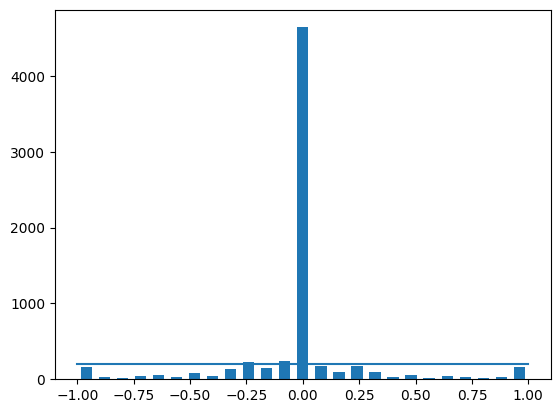

In [ ]:
sample_per_bin = 200
num_bins = 25
hist,bins = np.histogram(data['steering'],num_bins)
center = (bins[:-1]+bins[1:])*0.5
plt.bar(center, hist, width = 0.05)
plt.plot((np.min(data['steering']),np.max(data['steering'])),(sample_per_bin,sample_per_bin))

In [ ]:
print('totla data: ', len(data))
remove_list = []

for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if bins[j] <= data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[sample_per_bin:]
  remove_list.extend(list_)

print('removed: ' , len(remove_list))

totla data:  6791
removed:  4507


In [ ]:
data.drop(data.index[remove_list], inplace=True)


In [ ]:
print('remaing: ', len(data))


remaing:  2284


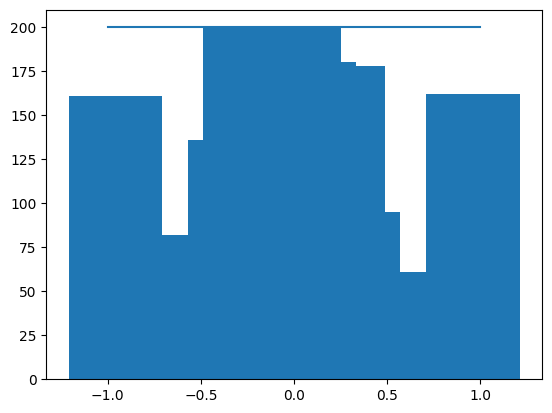

In [ ]:
hist,_ = np.histogram(data['steering'],(num_bins))

plt.bar(center,hist,width=0.5)
plt.plot((np.min(data['steering']),
          np.max(data['steering'])),
         (sample_per_bin,sample_per_bin))

In [ ]:
def load_img_streeng(df):
  image_paths = []
  steerings = []

  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center , left , right = indexed_data[0],indexed_data[1],indexed_data[2]
    image_paths.append(center.strip())
    steerings.append(float(indexed_data[3]))
  image_paths = np.asarray(image_paths)
  steerings = np.asarray(steerings)
  return image_paths , steerings

# print(data.iloc[10])

image_paths , steerings = load_img_streeng(data)
print(len(image_paths),len(steerings))


2284 2284


In [ ]:
# Test and train data

X_train ,X_valid, y_train, y_valid =  train_test_split(
    image_paths,
    steerings ,
    test_size = 0.2,
    random_state = 6)
print(len(X_train) ,len(X_valid), len(y_train), len(y_valid))

1827 457 1827 457


Text(0.5, 1.0, 'Validation Set')

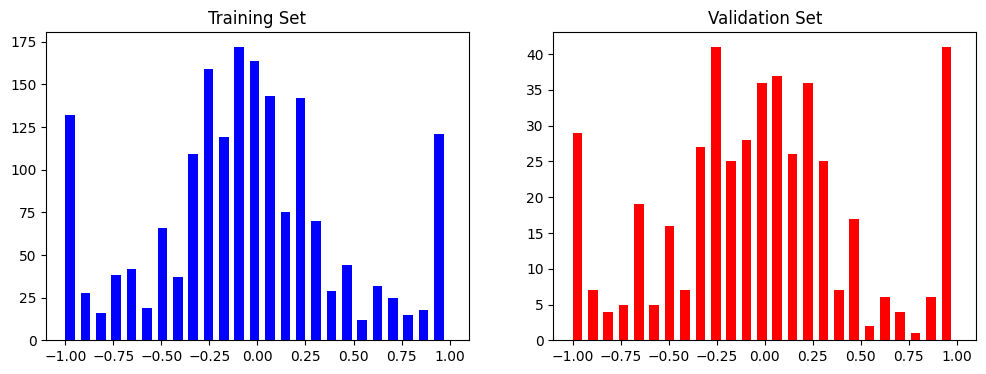

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(12,4))

axes[0].hist(y_train,bins = num_bins,width=0.05,color="blue")
axes[0].set_title('Training Set')

axes[1].hist(y_valid,bins = num_bins,width=0.05,color="red")
axes[1].set_title('Validation Set')

In [ ]:
def img_preprocess(img):
  img = mpimg.imread(img)
  img = img[60:135, :,:]
  img = cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
  img = cv2.GaussianBlur(img,(3,3),0)
  img = cv2.resize(img, (200,66))
  img = img/255
  return img

Text(0.5, 1.0, 'preprocessed image')

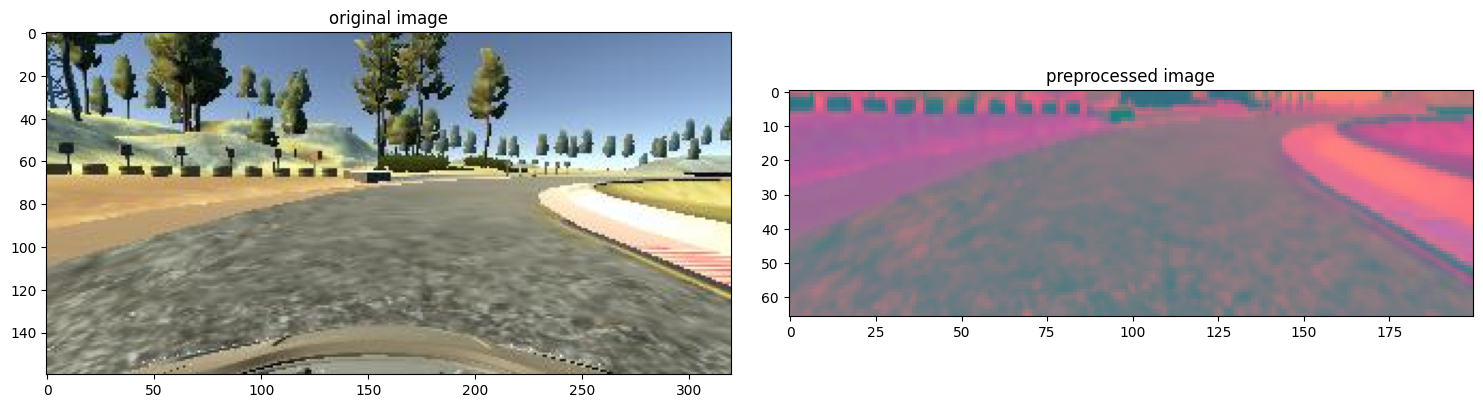

In [ ]:
image = image_paths[1000]


original_img = mpimg.imread(image)
preprocessed_img = img_preprocess(image)

fig,axs = plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_img)
axs[0].set_title('original image')

axs[1].imshow(preprocessed_img)
axs[1].set_title('preprocessed image')




In [ ]:
X_train = np.array(list(map(img_preprocess,X_train)))
X_valid = np.array(list(map(img_preprocess,X_valid)))


(1827, 66, 200, 3)


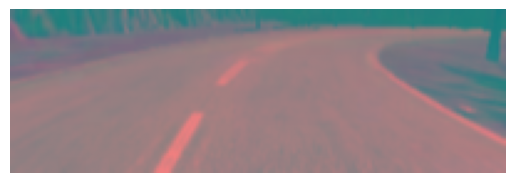

In [ ]:
plt.imshow(X_train[random.randint(0,len(X_train)-1)])
plt.axis('off')
print(X_train.shape)

In [ ]:
def nvidia_model():
  model = Sequential()
  model.add(Conv2D(24,(5,5),strides = (2,2), input_shape=(66,200,3),activation = 'elu'))
  model.add(Conv2D(36,(5,5),strides = (2,2),activation = 'elu'))
  model.add(Conv2D(48,(5,5),strides = (2,2),activation = 'elu'))
  model.add(Conv2D(64,(3,3),activation = 'elu'))
  model.add(Conv2D(64,(3,3),activation = 'elu'))
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(100, activation='elu'))
  model.add(Dropout(0.5))
  model.add(Dense(50, activation='elu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='elu'))
  model.add(Dropout(0.5))
  model.add(Dense(1))
  model.compile(Adam(lr=0.001),loss="mse")
  return model

In [ ]:
model = nvidia_model()
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 31, 98, 24)        1824      
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 47, 36)        21636     
                                                                 
 conv2d_22 (Conv2D)          (None, 5, 22, 48)         43248     
                                                                 
 conv2d_23 (Conv2D)          (None, 3, 20, 64)         27712     
                                                                 
 conv2d_24 (Conv2D)          (None, 1, 18, 64)         36928     
                                                                 
 dropout_8 (Dropout)         (None, 1, 18, 64)         0         
                                                                 
 flatten_4 (Flatten)         (None, 1152)             

In [ ]:
print(len(X_valid))

457


In [ ]:
history = model.fit(X_train,y_train, epochs=30, validation_data=(X_valid,y_valid),batch_size=100,verbose=1 , shuffle=1)

Epoch 1/30
19/19 [==============================] - 15s 688ms/step - loss: 0.9226 - val_loss: 0.2489
Epoch 2/30
19/19 [==============================] - 12s 619ms/step - loss: 0.3197 - val_loss: 0.2425
Epoch 3/30
19/19 [==============================] - 11s 546ms/step - loss: 0.2662 - val_loss: 0.2277
Epoch 4/30
19/19 [==============================] - 13s 672ms/step - loss: 0.2384 - val_loss: 0.1967
Epoch 5/30
19/19 [==============================] - 13s 673ms/step - loss: 0.2244 - val_loss: 0.1976
Epoch 6/30
19/19 [==============================] - 12s 621ms/step - loss: 0.2270 - val_loss: 0.1984
Epoch 7/30
19/19 [==============================] - 11s 541ms/step - loss: 0.2064 - val_loss: 0.1847
Epoch 8/30
19/19 [==============================] - 12s 657ms/step - loss: 0.2152 - val_loss: 0.1903
Epoch 9/30
19/19 [==============================] - 13s 671ms/step - loss: 0.2176 - val_loss: 0.1708
Epoch 10/30
19/19 [==============================] - 12s 626ms/step - loss: 0.1883 - val_lo

Text(0.5, 0, 'Epoch')

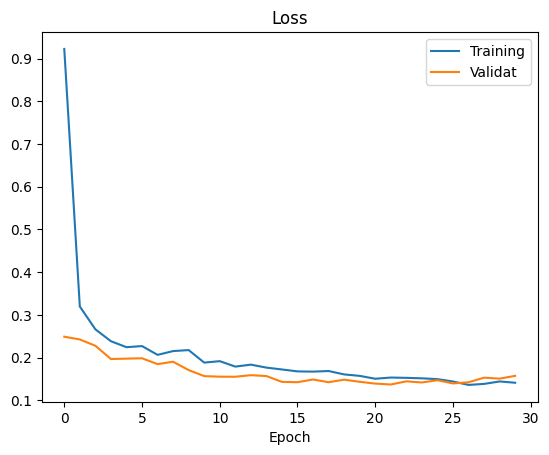

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(('Training', 'Validat'))
plt.title('Loss')
plt.xlabel('Epoch')


In [ ]:
model.save('model.h5')

In [ ]:
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>